In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SentimentAnalysis

Mounted at /content/drive
/content/drive/MyDrive/SentimentAnalysis


### Install and import libraries

In [ ]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 48.1 MB/s eta 0:00:00


In [ ]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 69.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load datasets

In [ ]:
data_train = pd.read_csv("datasets/vlsp_sentiment_train.csv", sep='\t')
data_train.columns =['Class', 'Data']
data_test = pd.read_csv("datasets/vlsp_sentiment_test.csv", sep='\t')
data_test.columns =['Class', 'Data']

In [ ]:
print(data_train.shape)
print(data_test.shape)

(5100, 2)
(1050, 2)


In [ ]:
data_train.sample(10)

,Class,Data
622,-1,Thôi. Tiền nào của đó. Mua cái dt khung kim lo...
3976,0,chỉ 8.1 tr thôi mà em nó ngang ngửa gtx 980 ( ...
937,-1,Chụp đêm xấu như nhau... Cái cảm biến bé như h...
3575,0,Thích mỗi tính năng sức khỏe của AW
1219,-1,ôi cái viền đấy chà bá luôn
2020,1,nhưng lại đón đầu và hoàn thiện hơn
2236,1,Cái gì cũng ngon chỉ thương hiệu là không ngon...
4257,0,Qihoo 360 Technology Co. Ltd. (Qihoo 360) is a...
2354,1,Mình thích nhất nhập liệu bằng giọng nói của G...
3439,0,Để mình thử cập nhật xme sao tại đang dùng 10....


<Axes: >

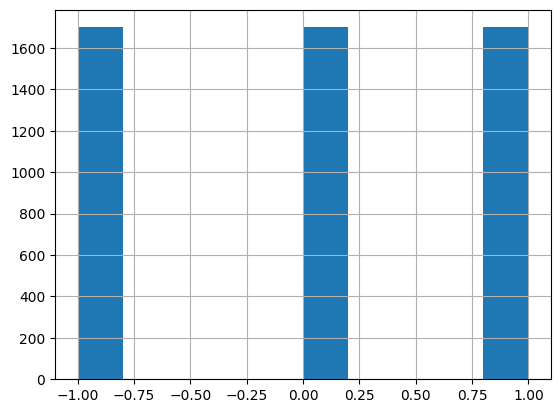

In [ ]:
data_train['Class'].hist()

### Preprocess

In [ ]:
def encode_label(labels):
  encoded_labels = []

  for label in labels:
    if label == -1:
        encoded_labels.append([1,0,0])
    elif label == 0:
        encoded_labels.append([0,1,0])
    else:
        encoded_labels.append([0,0,1])

  return np.array(encoded_labels)

encoded_labels = encode_label(data_train['Class'].values)
encoded_labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
# Normalize text using Underthesea
from underthesea import text_normalize

def normalize(text):
  return text_normalize(text)

# text = "Không nên mua chuột cua Logitech, vì dùng nó rất khó đổi cái mới. Mình nghe thằng bạn xúi mua con M325 cách đây 5 năm, dù có cơ số lần rơi rớt quăng quật mà đến giờ vẫn chưa hư. Giờ đang thèm em MX Anywhere 2 này mà chuột cũ chưa hư sao mua chuột mới!"
# print(normalize(text))

In [ ]:
# Remove url
import re

def remove_urls(text):
    url_pattern = re.compile(r'(http|https)://[^\s]+')
    cleaned_text = re.sub(url_pattern, '', text)

    return cleaned_text

In [ ]:
# Remove digits
from string import digits

def remove_digits(text):
    cleaned_text = ''.join([char for char in text if char not in digits])
    return cleaned_text

In [ ]:
# Remove duplicate punctuation
def remove_dup_punctuation(text):
  text.replace('...', '')
  cleaned_text = re.sub(r'([^\w\s])\1+', r'\1', text)

  return cleaned_text

In [ ]:
# Remove duplicate
def remove_dup_char(text):
  text = re.sub(r'([a-z])\1+', lambda m: m.group(1), text, flags=re.IGNORECASE)
  text = re.sub(r'([a-z][a-z])\1+', lambda m: m.group(1), text, flags=re.IGNORECASE)

  return text

In [ ]:
# Use PyVi for Vietnamese word tokenizer
from pyvi import ViTokenizer

def tokenize(text):
  text = ViTokenizer.tokenize(text.lower())
  return text.split(' ')

In [ ]:
# Combine all processing
def preprocess(text):
  text = normalize(text)
  text = remove_urls(text)
  text = remove_digits(text)
  text = remove_dup_punctuation(text)
  text = remove_dup_char(text)
  tokens = tokenize(text)

  return tokens

In [ ]:
data_train['Processed_data'] = data_train['Data'].apply(lambda x: preprocess(x))
data_test['Processed_data'] = data_test['Data'].apply(lambda x: preprocess(x))

In [ ]:
from random import randint

INDEX = randint(0, len(data_train['Data']))
print(data_train['Data'].tolist()[INDEX], sep="")
print(data_train['Processed_data'].to_list()[INDEX], sep="")

Ngon đấy, khá sát với nhu cầu của mình: - Luôn hiển thị giờ, để khi đi đường hoặc cần xem nhanh đỡ phải với tay bấm bất kì nút nào nữa. - Thời lượng sử dung chắc cần vài ngày, của tuần thì quá đẹp. - Báo cuộc gọi (có cả rung) với mình chưa quá cần thiết, có lẽ bác nào hay đi đường thì cần hơn.
['ngon', 'đấy', ',', 'khá', 'sát', 'với', 'nhu_cầu', 'của', 'mình', ':', '-', 'luôn', 'hiển_thị', 'giờ', ',', 'để', 'khi', 'đi', 'đường', 'hoặc', 'cần', 'xem', 'nhanh', 'đỡ', 'phải', 'với', 'tay', 'bấm', 'bất_kì', 'nút', 'nào', 'nữa', '.', '-', 'thời_lượng', 'sử', 'dung', 'chắc', 'cần', 'vài', 'ngày', ',', 'của', 'tuần', 'thì', 'quá', 'đẹp', '.', '-', 'báo', 'cuộc_gọi', '(', 'có', 'cả', 'rung', ')', 'với', 'mình', 'chưa', 'quá', 'cần_thiết', ',', 'có_lẽ', 'bác', 'nào', 'hay', 'đi', 'đường', 'thì', 'cần', 'hơn', '.']


In [ ]:
word_reviews = data_train['Processed_data'].to_list()

In [ ]:
EMBEDDING_DIM = 400 # how big is each word vector
MAX_VOCAB_SIZE = 10000 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 300 # max number of words in a comment to use

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(word_reviews)
sequences_train = tokenizer.texts_to_sequences(word_reviews)
word_index = tokenizer.word_index

In [ ]:
data = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
labels = encoded_labels

In [ ]:
print('Shape of X train and validation:', data.shape)
print('Shape of label train and validation:', labels.shape)

Shape of X train and validation: (5100, 300)
Shape of label train and validation: (5100, 3)


### Embedding using Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('models/vi-model-CBOW.bin', binary=True)

vocabulary_size=min(len(word_index)+1,MAX_VOCAB_SIZE)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
print("Vocabulary size:", vocabulary_size)
for word, i in word_index.items():
    if i>=MAX_VOCAB_SIZE:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

Vocabulary size: 7750


### Define and train model

In [ ]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout,concatenate
from tensorflow.keras.layers import Reshape, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
sequence_length = data.shape[1]
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
# reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv1D(num_filters, filter_sizes[0],activation='relu',kernel_regularizer=regularizers.l2(0.01))(embedding)
conv_1 = Conv1D(num_filters, filter_sizes[1],activation='relu',kernel_regularizer=regularizers.l2(0.01))(embedding)
conv_2 = Conv1D(num_filters, filter_sizes[2],activation='relu',kernel_regularizer=regularizers.l2(0.01))(embedding)
print(conv_1)
maxpool_0 = MaxPooling1D(sequence_length - filter_sizes[0] + 1, strides=1)(conv_0)
maxpool_1 = MaxPooling1D(sequence_length - filter_sizes[1] + 1, strides=1)(conv_1)
maxpool_2 = MaxPooling1D(sequence_length - filter_sizes[2] + 1, strides=1)(conv_2)

merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((3*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)


# this creates a model that includes
model = Model(inputs, output)


adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

KerasTensor(type_spec=TensorSpec(shape=(None, 297, 100), dtype=tf.float32, name=None), name='conv1d_1/Relu:0', description="created by layer 'conv1d_1'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 300, 400)             3100000   ['input_1[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 298, 100)             120100    ['embedding[0][0]']           
                                                                                                  
 conv1d_1 (Conv1D)           (None, 297

In [ ]:
model.fit(data, labels, validation_split=0.2,
          epochs=10, batch_size=256, callbacks=[], shuffle=True)

Epoch 1/10
16/16 [==============================] - 16s 327ms/step - loss: 6.8670 - accuracy: 0.4703 - val_loss: 8.0113 - val_accuracy: 0.0402
Epoch 2/10
16/16 [==============================] - 4s 270ms/step - loss: 5.2089 - accuracy: 0.6525 - val_loss: 6.1884 - val_accuracy: 0.1569
Epoch 3/10
16/16 [==============================] - 3s 187ms/step - loss: 4.3389 - accuracy: 0.7507 - val_loss: 6.4901 - val_accuracy: 0.0392
Epoch 4/10
16/16 [==============================] - 3s 175ms/step - loss: 3.7060 - accuracy: 0.8103 - val_loss: 5.3998 - val_accuracy: 0.1039
Epoch 5/10
16/16 [==============================] - 3s 197ms/step - loss: 3.1860 - accuracy: 0.8598 - val_loss: 4.9601 - val_accuracy: 0.1049
Epoch 6/10
16/16 [==============================] - 4s 260ms/step - loss: 2.7773 - accuracy: 0.8767 - val_loss: 4.5035 - val_accuracy: 0.1167
Epoch 7/10
16/16 [==============================] - 3s 158ms/step - loss: 2.3894 - accuracy: 0.9100 - val_loss: 4.5434 - val_accuracy: 0.0765
Epoch

### Predict and evaluate results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def calculate_metrics(X_test_scaled, Y_test,model = None):
    # Get model predictions
    if model:
       y_predict_r = model.predict(X_test_scaled)
    else:
       y_predict_r = X_test_scaled
    acc = accuracy_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r, average='macro')
    rec = recall_score(Y_test, y_predict_r, average='macro')
    f1 = f1_score(Y_test, y_predict_r, average='macro')

    return acc, prec, rec, f1

def get_metrics(X_test, Y_test, model = None):
    acc, prec, rec, f1 = calculate_metrics(X_test, Y_test, model = model)
    display_df = pd.DataFrame([[acc, prec, rec, f1]], columns=["Accuracy", "Precision", "Recall", "F1 Score"])
    return display_df

In [ ]:
sequences_test = tokenizer.texts_to_sequences(data_test['Processed_data'].to_list())
word_reviews_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
labels_test = encode_label(data_test['Class'].values)

In [ ]:
print('Shape of X test:', word_reviews_test.shape)
print('Shape of label test:', labels_test.shape)

Shape of X test: (1050, 300)
Shape of label test: (1050, 3)


In [ ]:
inference = model.predict(word_reviews_test)

33/33 [==============================] - 0s 8ms/step


In [ ]:
y_hat = [np.argmax(ele) for ele in inference]
y = [np.argmax(ele) for ele in labels_test]

df = get_metrics(y_hat, y, model = None)
df.index = ['CNN']
df.head(10)

,Accuracy,Precision,Recall,F1 Score
CNN,0.59619,0.647772,0.59619,0.554645


Text(0.5, 3.722222222222216, 'Predicted')

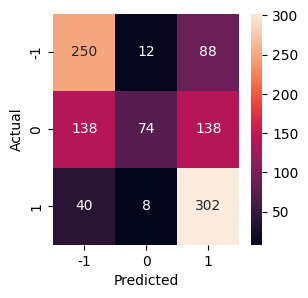

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(3, 3))
conf_mat = confusion_matrix(y, y_hat)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[-1,0,1], yticklabels=[-1,0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
model.save_weights("CNN.h5")
!cp CNN.h5 /content/drive/MyDrive/SentimentAnalysis/models